In [1]:
# Importing relavant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [2]:
# Reading the file
df = pd.read_csv('BBC.csv')

### Exploratory data analysis

In [3]:
df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,5,1,90000,2,0,5,1,0,2,2,50,1
1,5,1,60000,3,3,5,0,1,1,2,51,1
2,5,1,60000,3,3,5,1,1,5,2,51,1
3,5,2,70000,0,0,5,0,1,10,2,49,1
4,5,2,80000,5,5,5,1,4,2,2,48,1


In [4]:
# Descriptive statistics
df.describe()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,3.310106,1.494103,57305.777970,1.844352,1.004058,3.310106,0.676369,1.502705,6.003246,1.789710,54.603928,0.494049
std,1.426147,0.499979,32285.841703,1.612408,1.522660,1.426147,0.467874,1.138394,6.382562,0.872664,11.255252,0.499978
min,1.000000,1.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,36.000000,0.000000
25%,2.000000,1.000000,30000.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,46.000000,0.000000
50%,3.000000,1.000000,60000.000000,2.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,53.000000,0.000000
75%,5.000000,2.000000,70000.000000,3.000000,2.000000,5.000000,1.000000,2.000000,10.000000,3.000000,62.000000,1.000000
max,5.000000,2.000000,170000.000000,5.000000,5.000000,5.000000,1.000000,4.000000,20.000000,3.000000,106.000000,1.000000


In [5]:
df.isnull().sum()

MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
HouseOwnerFlag          0
NumberCarsOwned         0
CommuteDistance         0
Region                  0
Age                     0
BikeBuyer               0
dtype: int64

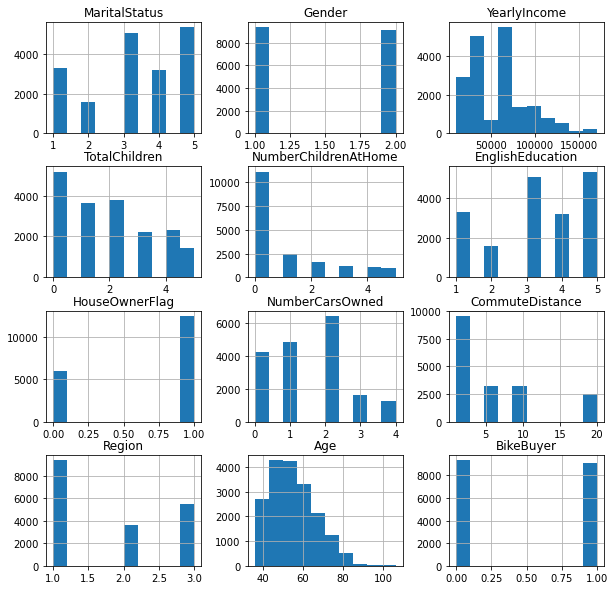

In [6]:
# Visualising distribution of the data
df.hist(figsize=(10,10));

In [7]:
df.nunique()

MaritalStatus            5
Gender                   2
YearlyIncome            16
TotalChildren            6
NumberChildrenAtHome     6
EnglishEducation         5
HouseOwnerFlag           2
NumberCarsOwned          5
CommuteDistance          5
Region                   3
Age                     70
BikeBuyer                2
dtype: int64

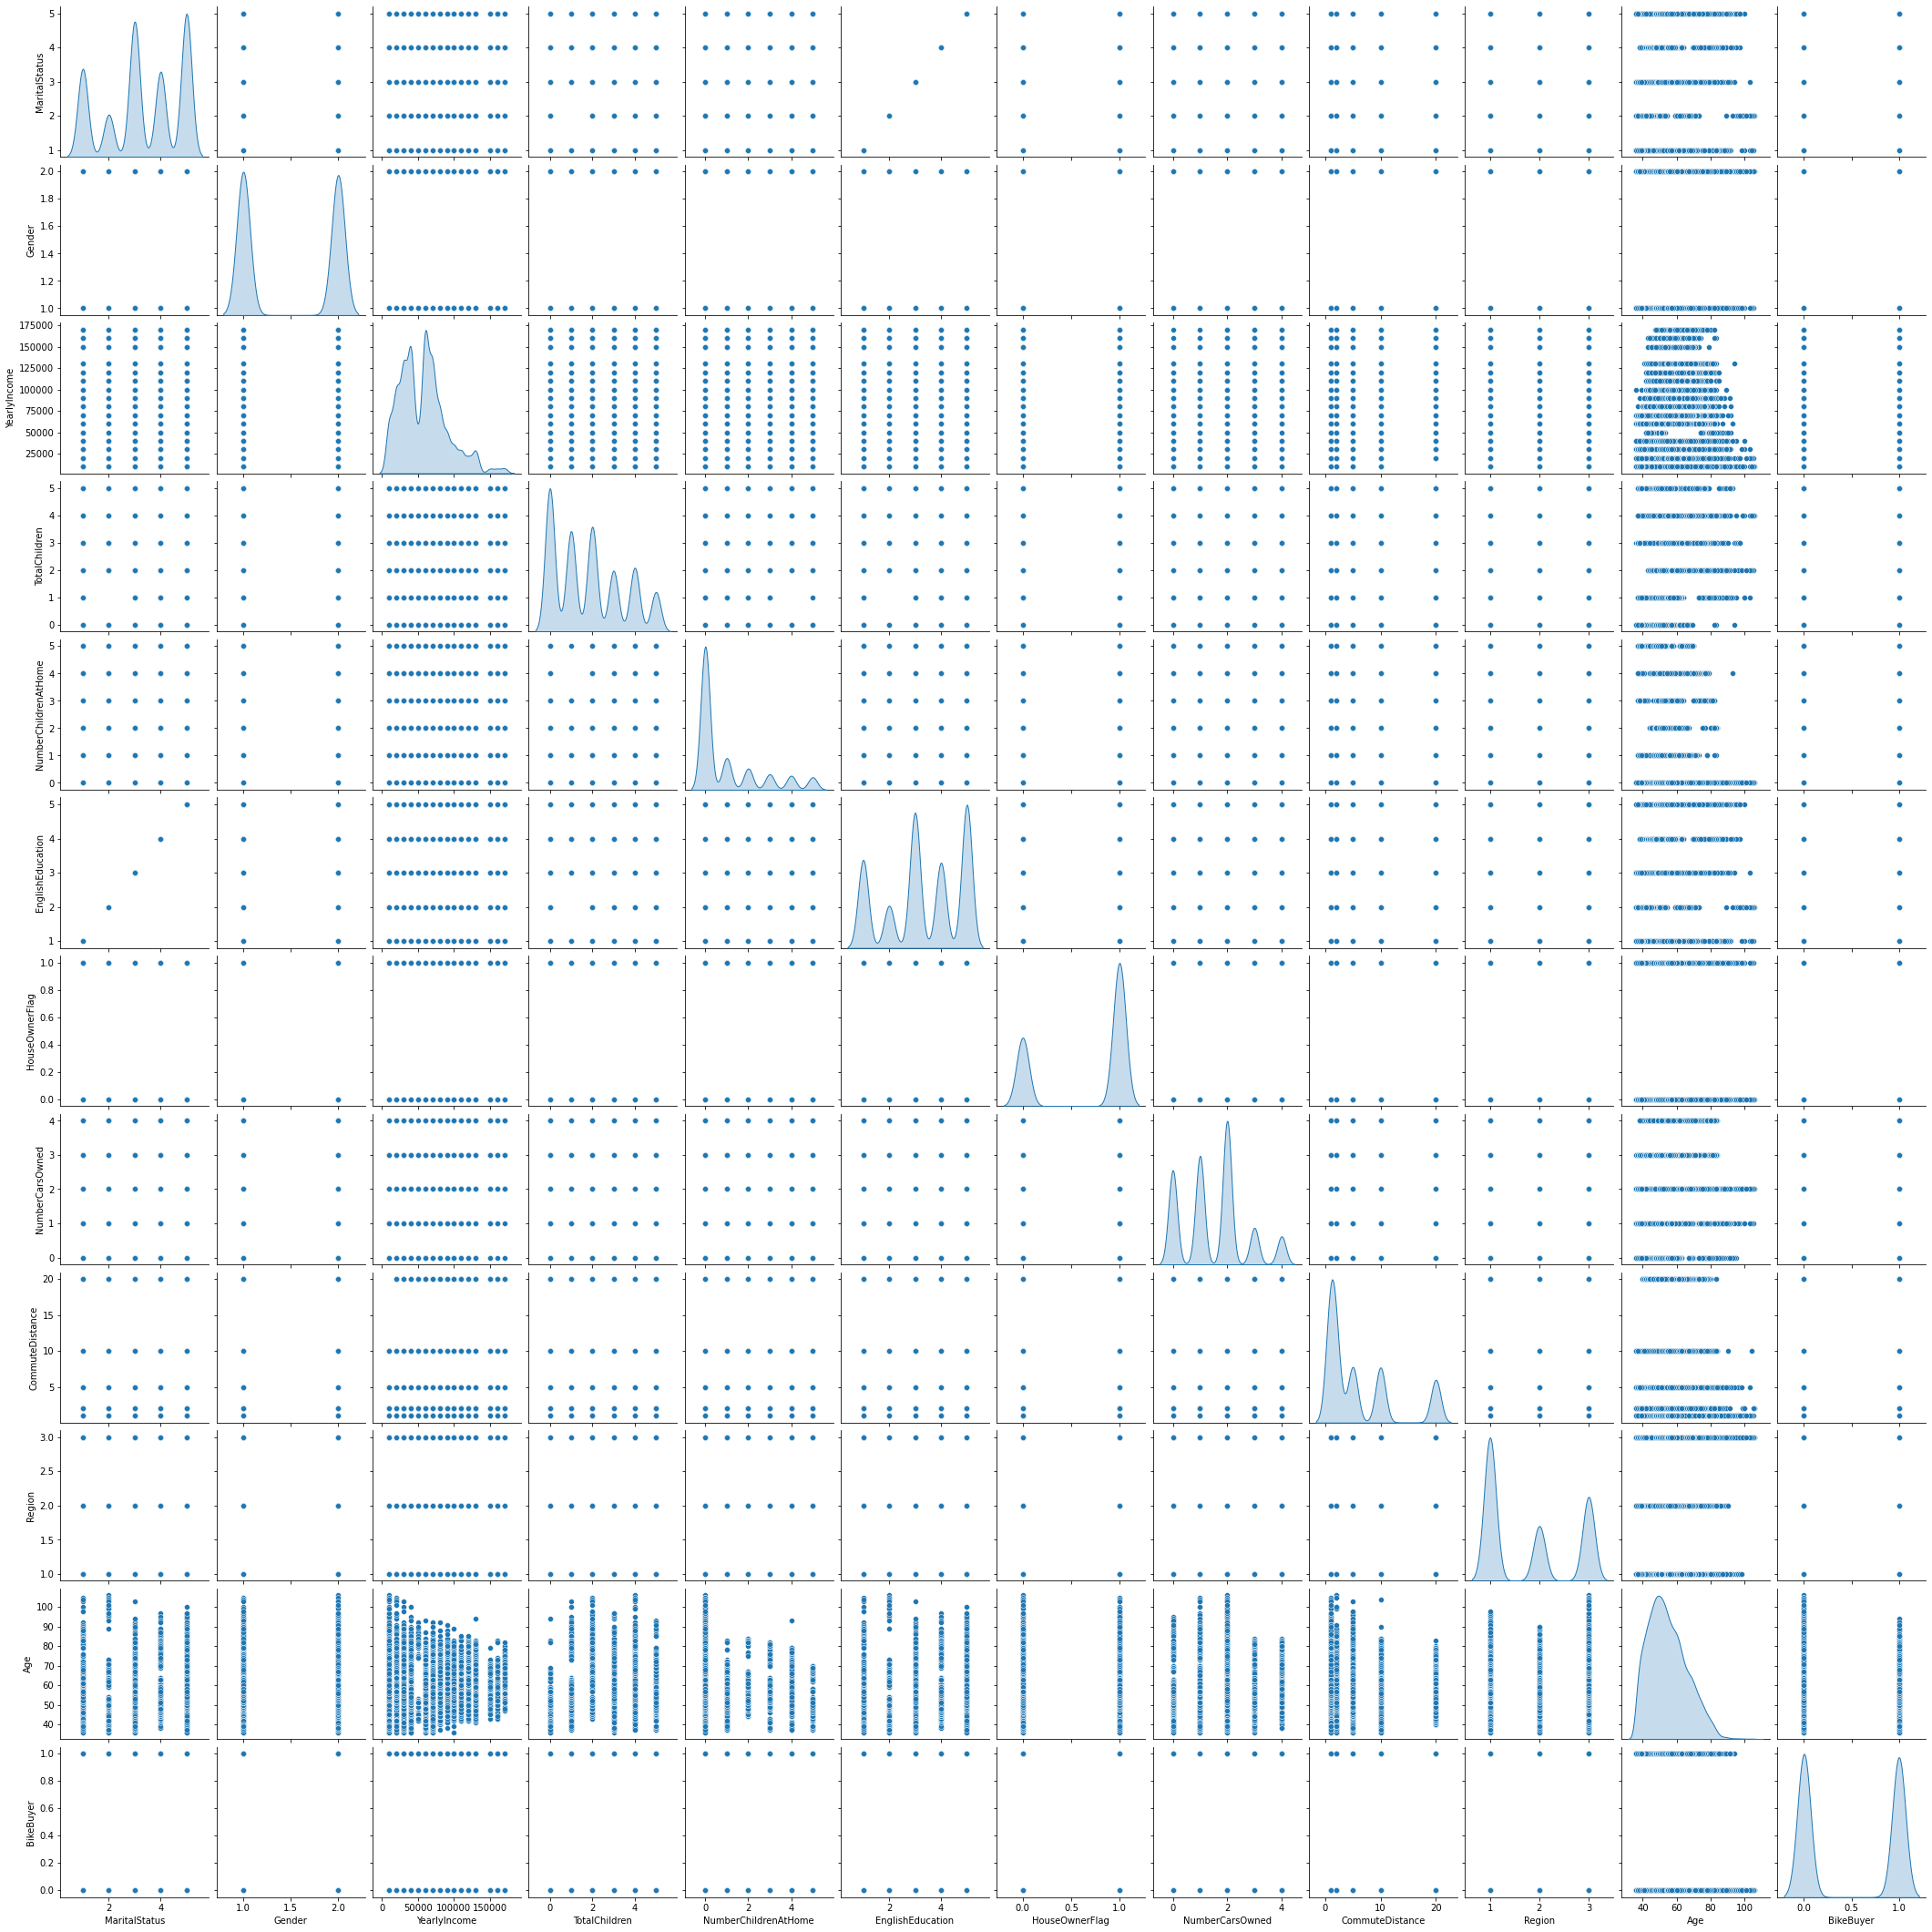

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [9]:
df.columns

Index(['MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'CommuteDistance', 'Region', 'Age', 'BikeBuyer'],
      dtype='object')

In [10]:
df['CommuteDistance'].unique()

array([ 2,  1,  5, 10, 20], dtype=int64)

In [11]:
cat = df.drop(['Age', 'YearlyIncome', 'Gender', 'BikeBuyer', 'HouseOwnerFlag'], axis=1).columns
cat

Index(['MaritalStatus', 'TotalChildren', 'NumberChildrenAtHome',
       'EnglishEducation', 'NumberCarsOwned', 'CommuteDistance', 'Region'],
      dtype='object')

In [12]:
df1 = pd.get_dummies(df, columns=cat, drop_first=True)
df1.head()

,Gender,YearlyIncome,HouseOwnerFlag,Age,BikeBuyer,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,TotalChildren_1,...,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,CommuteDistance_2,CommuteDistance_5,CommuteDistance_10,CommuteDistance_20,Region_2,Region_3
0,1,90000,1,50,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,60000,0,51,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,60000,1,51,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,2,70000,0,49,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,2,80000,1,48,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [13]:
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])

In [14]:
df1.head()

,Gender,YearlyIncome,HouseOwnerFlag,Age,BikeBuyer,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,TotalChildren_1,...,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,CommuteDistance_2,CommuteDistance_5,CommuteDistance_10,CommuteDistance_20,Region_2,Region_3
0,0,90000,1,50,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,60000,0,51,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,60000,1,51,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,1,70000,0,49,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,1,80000,1,48,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


Since the values in our features have wide ranges between 0 and 170,000 to improve the performance of the model, the features will be scaled

In [15]:
# Scaling the data
scaler = MinMaxScaler()

In [16]:
X = df1.drop('BikeBuyer', axis=1).values

In [17]:
y = df1['BikeBuyer'].values

In [18]:
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.    , 0.5   , 1.    , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.3125, 0.    , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.3125, 1.    , ..., 0.    , 1.    , 0.    ],
       ...,
       [0.    , 0.125 , 0.    , ..., 0.    , 0.    , 1.    ],
       [0.    , 0.125 , 1.    , ..., 0.    , 0.    , 1.    ],
       [0.    , 0.125 , 1.    , ..., 0.    , 0.    , 1.    ]])

In [20]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)

(14787, 32)
(14787,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(3697, 32)
(3697,)


### Building the model
Since this is a binary classification problem, the activation function in the final layer of the model is sigmoid

In [23]:
# Building the deep neural network model
model = Sequential()
model.add(Dense(100, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
592/592 [==============================] - 2s 2ms/step - loss: 0.6279 - accuracy: 0.6474 - val_loss: 0.5846 - val_accuracy: 0.7008
Epoch 2/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.7151 - val_loss: 0.5629 - val_accuracy: 0.7201
Epoch 3/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7335 - val_loss: 0.5619 - val_accuracy: 0.7302
Epoch 4/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.7454 - val_loss: 0.5440 - val_accuracy: 0.7370
Epoch 5/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7514 - val_loss: 0.5320 - val_accuracy: 0.7323
Epoch 6/100
592/592 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7568 - val_loss: 0.5337 - val_accuracy: 0.7502
Epoch 7/100
592/592 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.7629 - val_loss: 0.5105 - val_accuracy: 0.7505

Epoch 58/100
592/592 [==============================] - 1s 1ms/step - loss: 0.3876 - accuracy: 0.8105 - val_loss: 0.6391 - val_accuracy: 0.7759
Epoch 59/100
592/592 [==============================] - 1s 1ms/step - loss: 0.3879 - accuracy: 0.8107 - val_loss: 0.6743 - val_accuracy: 0.7701
Epoch 60/100
592/592 [==============================] - 1s 1ms/step - loss: 0.3836 - accuracy: 0.8139 - val_loss: 0.7522 - val_accuracy: 0.7725
Epoch 61/100
592/592 [==============================] - 1s 1ms/step - loss: 0.3842 - accuracy: 0.8130 - val_loss: 0.7096 - val_accuracy: 0.7634
Epoch 62/100
592/592 [==============================] - 1s 1ms/step - loss: 0.3838 - accuracy: 0.8124 - val_loss: 0.6496 - val_accuracy: 0.7725
Epoch 63/100
592/592 [==============================] - 1s 2ms/step - loss: 0.3795 - accuracy: 0.8138 - val_loss: 0.7337 - val_accuracy: 0.7765
Epoch 64/100
592/592 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8139 - val_loss: 0.7380 - val_accuracy:

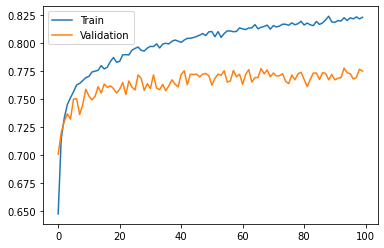

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])

### Model validation

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
threshold = 0.5

In [31]:
y_pred = model.predict(X_test)

116/116 [==============================] - 0s 733us/step


In [35]:
y_pred = np.where(y_pred > threshold, 1,0)

In [36]:
y_pred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

<AxesSubplot:>

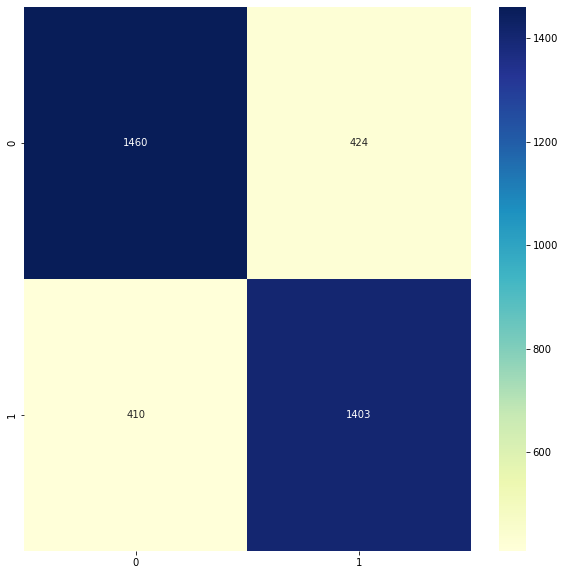

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, fmt='d', cmap='YlGnBu')

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1884
           1       0.77      0.77      0.77      1813

    accuracy                           0.77      3697
   macro avg       0.77      0.77      0.77      3697
weighted avg       0.77      0.77      0.77      3697

